In [1]:
# Load packages and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Sampling shape 1...
Sampling shape 2...
Sampling shape 3...
Sampling shape 4...
Adding noise...
Rotating...
Drawing...
Rendering...


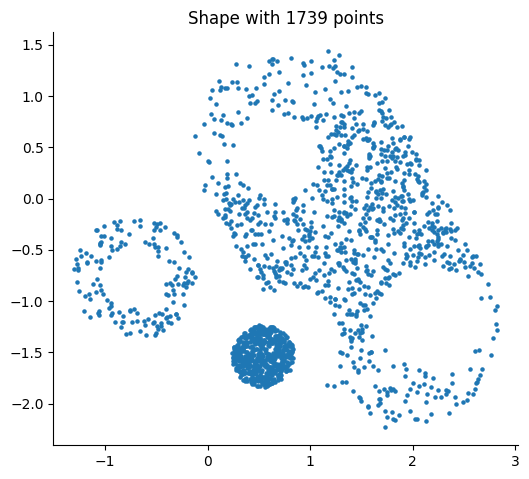

In [7]:
# Set up parameters
pointcount_shape1 = 1000
pointcount_shape2 = 300
pointcount_shape3 = 600
pointcount_shape4 = 200
noise_radius = 0.01
points_12 = []
points_34 = []
points = []

# Shape 1: Square
print('Sampling shape 1...',flush=True)
for _ in range(pointcount_shape1):
    points_12.append(2*np.random.random(2))
    
# Shape 2: Disk split in two on both sides of square
print('Sampling shape 2...',flush=True)
for _ in range(pointcount_shape2):
    uniform = np.random.random()
    normal = np.random.normal(size=2)
    point = np.sqrt(uniform)/np.sqrt(normal[0]**2 + normal[1]**2) * normal
    if point[0] <= 0:
        points_12.append(point + np.array([0,1]))
    else:
        points_12.append(point + np.array([2,1]))
        
# Remove parts of shapes
remove_12 = []
for i,point in enumerate(points_12):
    
    # Remove disk on left side
    if np.sqrt(point[0]**2+(point[1]-.8)**2)<0.4:
        remove_12.append(i)
    
    # Remove dent on right side
    elif np.sqrt((point[0]-1.6)**2+point[1]**2)<0.5:
        remove_12.append(i)

    # Remove smaller disk on right side
    elif np.sqrt((point[0]-2.1)**2+(point[1]-1.3)**2)<0.52:
        remove_12.append(i)
        
# Shape 3: Smaller disk on right
print('Sampling shape 3...',flush=True)
for i in range(pointcount_shape3):
    uniform = np.random.random()
    normal = np.random.normal(size=2)
    point = .3*np.sqrt(uniform)/np.sqrt(sum([x**2 for x in normal])) * normal
    points_34.append(point+np.array([1.6,-.3]))    
    
# Shape 4: Annulus on left
print('Sampling shape 4...',flush=True)
for i in range(pointcount_shape4):
    uniform = np.random.random()
    normal = np.random.normal(size=2)
    if np.sqrt(uniform) > .5:
        point = .6*np.sqrt(uniform)/np.sqrt(sum([x**2 for x in normal])) * normal
        points_34.append(point+np.array([.3,-1]))    
    
# Add noise
print('Adding noise...',flush=True)
for i,point in enumerate(points_12+points_34):
    if i not in remove_12:
        noise = np.random.random(2)*noise_radius*2-noise_radius
        points.append(point+noise)
        
# Rotate
print('Rotating...',flush=True)
angle = -np.pi/3
points_final = [np.matmul(
        np.array([[np.cos(angle), -np.sin(angle)],[np.sin(angle),np.cos(angle)]]),
        np.array([p[0],p[1]])
    ) for p in points]
        
# Export
# export_array = np.array(points_final)
# np.save('generated_data.npy',export_array)
# df = pd.DataFrame.from_dict({'x':np.transpose(export_array)[0], 'y':np.transpose(export_array)[1]})
# df.to_csv('generated_data.csv', index=False)
    
# Initialize figure
print('Drawing...',flush=True)
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
ax.set_title('Shape with '+str(len(points_final))+' points')
data = np.transpose(np.array(points_final))
ax.scatter(data[0],data[1],s=5)
ax.spines[['right', 'top']].set_visible(False)
ax.set_aspect('equal')    
# Show 
print('Rendering...',flush=True)
plt.show()